In [54]:
import osmnx as ox
import random, heapq

In [55]:
G = ox.graph_from_place('Montevideo, Uruguay', network_type='drive')

In [56]:
def style_unvisited_edge(edge):        
    G.edges[edge]["color"] = "#302f74"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def style_visited_edge(edge):
    G.edges[edge]["color"] = "#9e65c1"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

Destination found


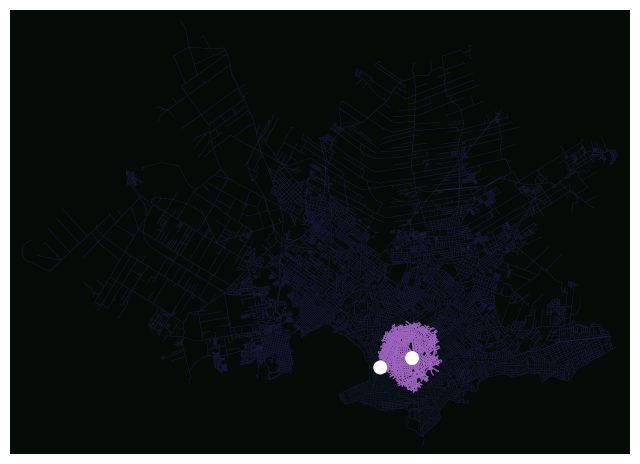

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [57]:
def dijkstra(graph, start_edge, destination_edge):
    distances = {edge: float('inf') for edge in graph.edges}
    distances[start_edge] = 0

    for node in G.nodes:
        G.nodes[node]['size'] = 0

    queue = [(0, start_edge)]
    visited = set()
    for edge in G.edges:
        style_unvisited_edge(edge)

    start_node = start_edge[0]
    end_node = destination_edge[0]
    graph.nodes[start_node]['size'] = 100
    graph.nodes[end_node]['size'] = 100

    while queue:
        _, current_edge = heapq.heappop(queue)
        if current_edge in visited:
            continue
        visited.add(current_edge)
        style_visited_edge(current_edge)

        if current_edge == destination_edge:
            print('Destination found')
            break

        start_node, end_node, key = current_edge

        neighbours = list(graph.neighbors(end_node))        

        for neighbour in neighbours:
            if neighbour in (start_node, end_node):
                continue
            edge_length = graph[end_node][neighbour][0]['length']
            distance_from_origin = distances[current_edge] + edge_length

            if distance_from_origin < distances[(end_node, neighbour, key)]: 
                distances[(end_node, neighbour, key)] = distance_from_origin
                heapq.heappush(queue, (distance_from_origin, (end_node, neighbour, key)))

dijkstra(G, random.choice(list((G.edges))), random.choice(list(G.edges)))
default_alpha = 1.0 
default_linewidth = 1.0
default_color = 'gray'
ox.plot_graph(G,
    node_size =  [G.nodes[node]['size'] for node in G.nodes ],
    edge_color=[G.edges[edge].get("color", default_color) for edge in G.edges],
    edge_alpha=[G.edges[edge].get("alpha", default_alpha) for edge in G.edges],
    edge_linewidth=[G.edges[edge].get("linewidth", default_linewidth) for edge in G.edges],
    bgcolor="#050b07"
)